In [1]:
# importing libraries
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder


In [2]:
df = pd.read_csv("AIProjectData2.csv")
df.to_pickle('df.pkl')    #to save the dataframe, df to 123.pkl
df1 = pd.read_pickle('df.pkl') #to load 123.pkl back to the dataframe df
print(df1)

            ID  \
0    19BCE0370   
1    19BCE0148   
2    20BCE2014   
3    20BEC0414   
4    20BCE0684   
..         ...   
96   20BEC0298   
97   20BCE2663   
98   20BCI0088   
99   20BCE2006   
100  20BCT0154   

                                                                    Bios  \
0                                                        Fun. Talkative.   
1                                     Procrastinator. Sporty. Intuitive.   
2    Bored. Procrastinator. Ambitious. HardWorking. Emotinal. Sensitive.   
3                                                               Nothing.   
4                                              Bold. Hardworking. Funny.   
..                                                                   ...   
96                                            Confident. Geek. Dreamer.    
97                                                            Extrovert.   
98                                                              Learner.   
99                     

In [3]:
# Instantiating the lemmatizer
lemmatizer = WordNetLemmatizer()

# Tokenizing Function
def tokenize(text):
    """
    Tokenizing the bios, then lemmatizing them
    """
    # Creating a library of stopwords
    stops = stopwords.words('english')
    
    # Lowercasing the words
    text = text.lower()
    
    # Removing the punctuations (periods)
    text = text.replace('.', '')
    
    # Splitting on spaces between words
    text = text.split(' ')
    
    # Lemmatizing the words and removing stop words
    text = [lemmatizer.lemmatize(i) for i in text if i not in stops]
    
    return text
    
# Applying the function to each user bio
df1['Bios'] = df.Bios.apply(tokenize)
print(df1['Bios'])

0                                                          [fun, talkative]
1                                       [procrastinator, sporty, intuitive]
2      [bored, procrastinator, ambitious, hardworking, emotinal, sensitive]
3                                                                 [nothing]
4                                                [bold, hardworking, funny]
                                       ...                                 
96                                             [confident, geek, dreamer, ]
97                                                              [extrovert]
98                                                                [learner]
99                                                                       []
100                                       [programmer, coding, bodybuilder]
Name: Bios, Length: 101, dtype: object


## Finding the most frequent words

In [5]:
total_vocab = set()

for bio in df['Bios']:
    total_vocab.update(bio)
        
print("Number of unique words: ",len(total_vocab))

Number of unique words:  50


In [6]:
# Determining the most frequent words in user bios
words = []

for bio in df1['Bios']:
    words.extend(bio)
for i in words:
        if(i == "nothing"):
            words.remove(i)
bio_freq = FreqDist(words)
bio_freq.most_common(len(total_vocab))

[('fun', 12),
 ('extrovert', 9),
 ('hardworking', 7),
 ('empathetic', 7),
 ('', 7),
 ('ambivert', 6),
 ('introvert', 6),
 ('funny', 5),
 ('outgoing', 5),
 ('adventurous', 5),
 ('friendly', 5),
 ('creative', 5),
 ('procrastinator', 4),
 ('ambitious', 4),
 ('kind', 4),
 ('honest', 4),
 ('helpful', 3),
 ('sarcastic', 3),
 ('chill', 3),
 ('happy-go-lucky', 3),
 ('loving', 3),
 ('confident', 3),
 ('smart', 3),
 ('clever', 3),
 ('explorer', 3),
 ('learner', 3),
 ('nothing', 3),
 ('sensitive', 2),
 ('stubborn', 2),
 ('good', 2),
 ('music', 2),
 ('passionate', 2),
 ('lively', 2),
 ('curious', 2),
 ('reading', 2),
 ('positive', 2),
 ('understanding', 2),
 ('dreamer', 2),
 ('lazy', 2),
 ('boring', 2),
 ('moody', 2),
 ('talkative', 1),
 ('sporty', 1),
 ('intuitive', 1),
 ('bored', 1),
 ('emotinal', 1),
 ('bold', 1),
 ('caring', 1),
 ('dead', 1),
 ('best', 1)]

## Plotting the most frequent words

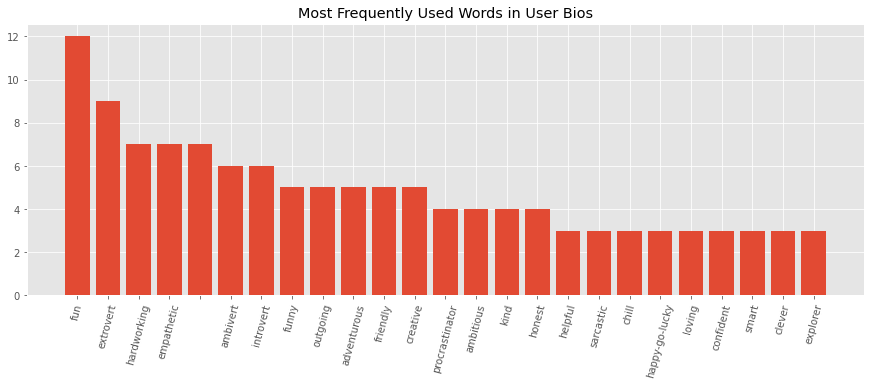

In [7]:
plt.style.use('ggplot')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bio_freq.most_common(25)))
plt.xticks(rotation=75)
plt.title('Most Frequently Used Words in User Bios')
plt.show()

## Bigrams

In [8]:

# Instantiating the score of each bigram
bigram_meas = BigramAssocMeasures()

# Finding and ranking the Bigrams in each bio
bio_finder = BigramCollocationFinder.from_words(words)

# Finding the frequency scores of each bigram 
bio_scored = bio_finder.score_ngrams(bigram_meas.raw_freq)
# Top 10 most common bigrams
bio_scored[:10]


[(('fun', 'loving'), 0.010948905109489052),
 (('', 'extrovert'), 0.0072992700729927005),
 (('explorer', 'adventurous'), 0.0072992700729927005),
 (('fun', 'extrovert'), 0.0072992700729927005),
 (('fun', 'introvert'), 0.0072992700729927005),
 (('hardworking', 'introvert'), 0.0072992700729927005),
 (('lively', 'extrovert'), 0.0072992700729927005),
 (('', 'calm'), 0.0036496350364963502),
 (('', 'charming'), 0.0036496350364963502),
 (('', 'confident'), 0.0036496350364963502)]

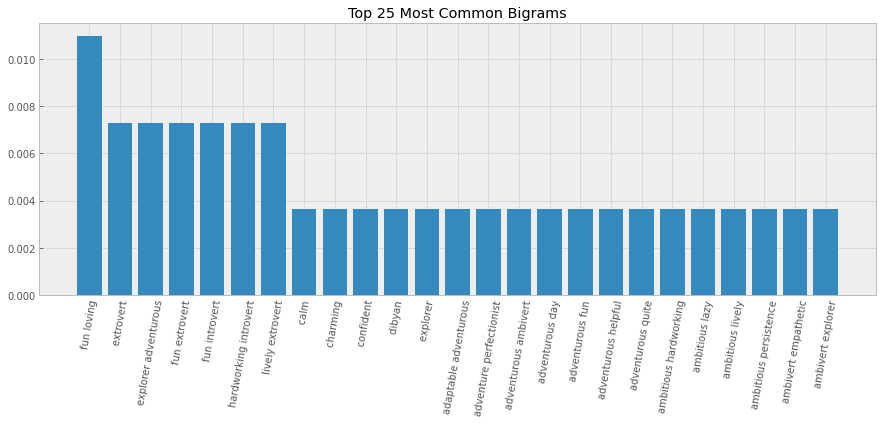

In [9]:
# Creating a list of the bigrams
bg = list(map(lambda x: x[0][0] + ' ' + x[0][1], bio_scored[:50]))

# Creating a list of the frequency scores
bio_scores = list(map(lambda x: x[1], bio_scored[:50]))

# Combining both the scores and the bigrams
bigrams = list(zip(bg, bio_scores))

# Plotting the bigrams and their frequency scores
plt.style.use('bmh')
plt.figure(figsize=(15,5))

plt.bar(*zip(*bigrams[:25]))
plt.xticks(rotation=80)
plt.title('Top 25 Most Common Bigrams')
plt.show()

In [10]:
# Creating bigrams for each pair of words in the bios
df1['Bigrams'] = df1.Bios.apply(lambda bio: BigramCollocationFinder.from_words(bio).nbest(bigram_meas.pmi, 100))

In [11]:
df1[['Bios', 'Bigrams']]

,Bios,Bigrams
0,"[fun, talkative]","[(fun, talkative)]"
1,"[procrastinator, sporty, intuitive]","[(procrastinator, sporty), (sporty, intuitive)]"
2,"[bored, procrastinator, ambitious, hardworking, emotinal, sensitive]","[(ambitious, hardworking), (bored, procrastinator), (emotinal, sensitive), (hardworking, emotinal), (procrastinator, ambitious)]"
3,[nothing],[]
4,"[bold, hardworking, funny]","[(bold, hardworking), (hardworking, funny)]"
...,...,...
96,"[confident, geek, dreamer, ]","[(confident, geek), (dreamer, ), (geek, dreamer)]"
97,[extrovert],[]
98,[learner],[]
99,[],[]


## Exporting the data

In [12]:
# Pickling the tokenized words and bigrams
with open("clean_bigram_df.pkl", "wb") as fp:
    pickle.dump(df, fp)